In [1]:
from ordinor import constants as const
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Log Data Characteristics

##### |L|: Log size by number of events

$|L| \in \{ 10^4, 10^5, 10^6 \}$

##### |R|: Number of distinct resources in the log
$|R| \in \{ 10, 100, 10^3 \}$

##### |P|: Number of candidate attributes in the log
$|P|: \in \{ 1, 10 \}$

##### NOTE: the number of candidate splits to generate (S) is fixed to $10$


In [2]:
# consider 1 core process dimension only - "type of work"; mapped onto activity types

# 4 event logs

# |L|: 100,000
# 10,000 cases, each containing 10 events - note that case grouping does not matter
# Note: case identifiers do not matter when there is only 1 dimension for events

# |R|: 100 resources
# |P|: 1 attribute, of 20 type values (activities)

N_CASES = 10000
N_EVENTS_PER_CASE = 10
N_EVENTS = N_CASES * N_EVENTS_PER_CASE

N_RESOURCES = 10

N_TYPE_VALUES = {
    'attr-1': 5,
    'attr-2': 5,
    'attr-3': 5,
    'attr-4': 5,
    'attr-5': 5,
    'attr-6': 5,
    'attr-7': 5,
    'attr-8': 5,
    'attr-9': 5,
    'attr-10': 5,
}

data = []
for ic in range(N_CASES):
    case_id = f'case-{ic+1}'
    for ie in range(N_EVENTS_PER_CASE):
        # case id, resource label, activity label, timestamp
        # type attribute values
        data.append([case_id, '', '', (ic + 1) * (ie + 1)] + [''] * len(N_TYPE_VALUES))

COLUMNS = [const.CASE_ID, const.RESOURCE, const.ACTIVITY, const.TIMESTAMP]        

data = np.array(data)
np.random.shuffle(data)
print(data)

resources = [f'R-{i}' for i in range(N_RESOURCES)]
print(resources)

type_values = {}
for attr, n_val in N_TYPE_VALUES.items():
    COLUMNS.append(attr)
    type_values[attr] = [f'{attr}:{j+1}' for j in range(n_val)]
print(type_values)

# Visualization config
def get_plots(nfig):
    f, ax = plt.subplots(nrows=nfig, ncols=1, figsize=(30, nfig * 10))
    return f, ax

[['case-6126' '' '' ... '' '' '']
 ['case-7019' '' '' ... '' '' '']
 ['case-7630' '' '' ... '' '' '']
 ...
 ['case-6760' '' '' ... '' '' '']
 ['case-3059' '' '' ... '' '' '']
 ['case-4973' '' '' ... '' '' '']]
['R-0', 'R-1', 'R-2', 'R-3', 'R-4', 'R-5', 'R-6', 'R-7', 'R-8', 'R-9']
{'attr-1': ['attr-1:1', 'attr-1:2', 'attr-1:3', 'attr-1:4', 'attr-1:5'], 'attr-2': ['attr-2:1', 'attr-2:2', 'attr-2:3', 'attr-2:4', 'attr-2:5'], 'attr-3': ['attr-3:1', 'attr-3:2', 'attr-3:3', 'attr-3:4', 'attr-3:5'], 'attr-4': ['attr-4:1', 'attr-4:2', 'attr-4:3', 'attr-4:4', 'attr-4:5'], 'attr-5': ['attr-5:1', 'attr-5:2', 'attr-5:3', 'attr-5:4', 'attr-5:5'], 'attr-6': ['attr-6:1', 'attr-6:2', 'attr-6:3', 'attr-6:4', 'attr-6:5'], 'attr-7': ['attr-7:1', 'attr-7:2', 'attr-7:3', 'attr-7:4', 'attr-7:5'], 'attr-8': ['attr-8:1', 'attr-8:2', 'attr-8:3', 'attr-8:4', 'attr-8:5'], 'attr-9': ['attr-9:1', 'attr-9:2', 'attr-9:3', 'attr-9:4', 'attr-9:5'], 'attr-10': ['attr-10:1', 'attr-10:2', 'attr-10:3', 'attr-10:4', 'attr-

      case:concept:name org:resource  \
0             case-3556          R-1   
1             case-1576          R-3   
2             case-2551          R-6   
3             case-5923          R-5   
4             case-4089          R-7   
...                 ...          ...   
99995         case-5479          R-0   
99996         case-3744          R-4   
99997         case-7483          R-9   
99998         case-1141          R-7   
99999         case-5553          R-8   

                                            concept:name time:timestamp  \
0      attr-1:1+attr-1:1+attr-1:1+attr-1:1+attr-1:1+a...           7112   
1      attr-1:1+attr-1:1+attr-1:1+attr-1:1+attr-1:1+a...           4728   
2      attr-1:1+attr-1:1+attr-1:1+attr-1:1+attr-1:1+a...          12755   
3      attr-1:1+attr-1:1+attr-1:1+attr-1:1+attr-1:1+a...          53307   
4      attr-1:1+attr-1:1+attr-1:1+attr-1:1+attr-1:1+a...          16356   
...                                                  ...            .

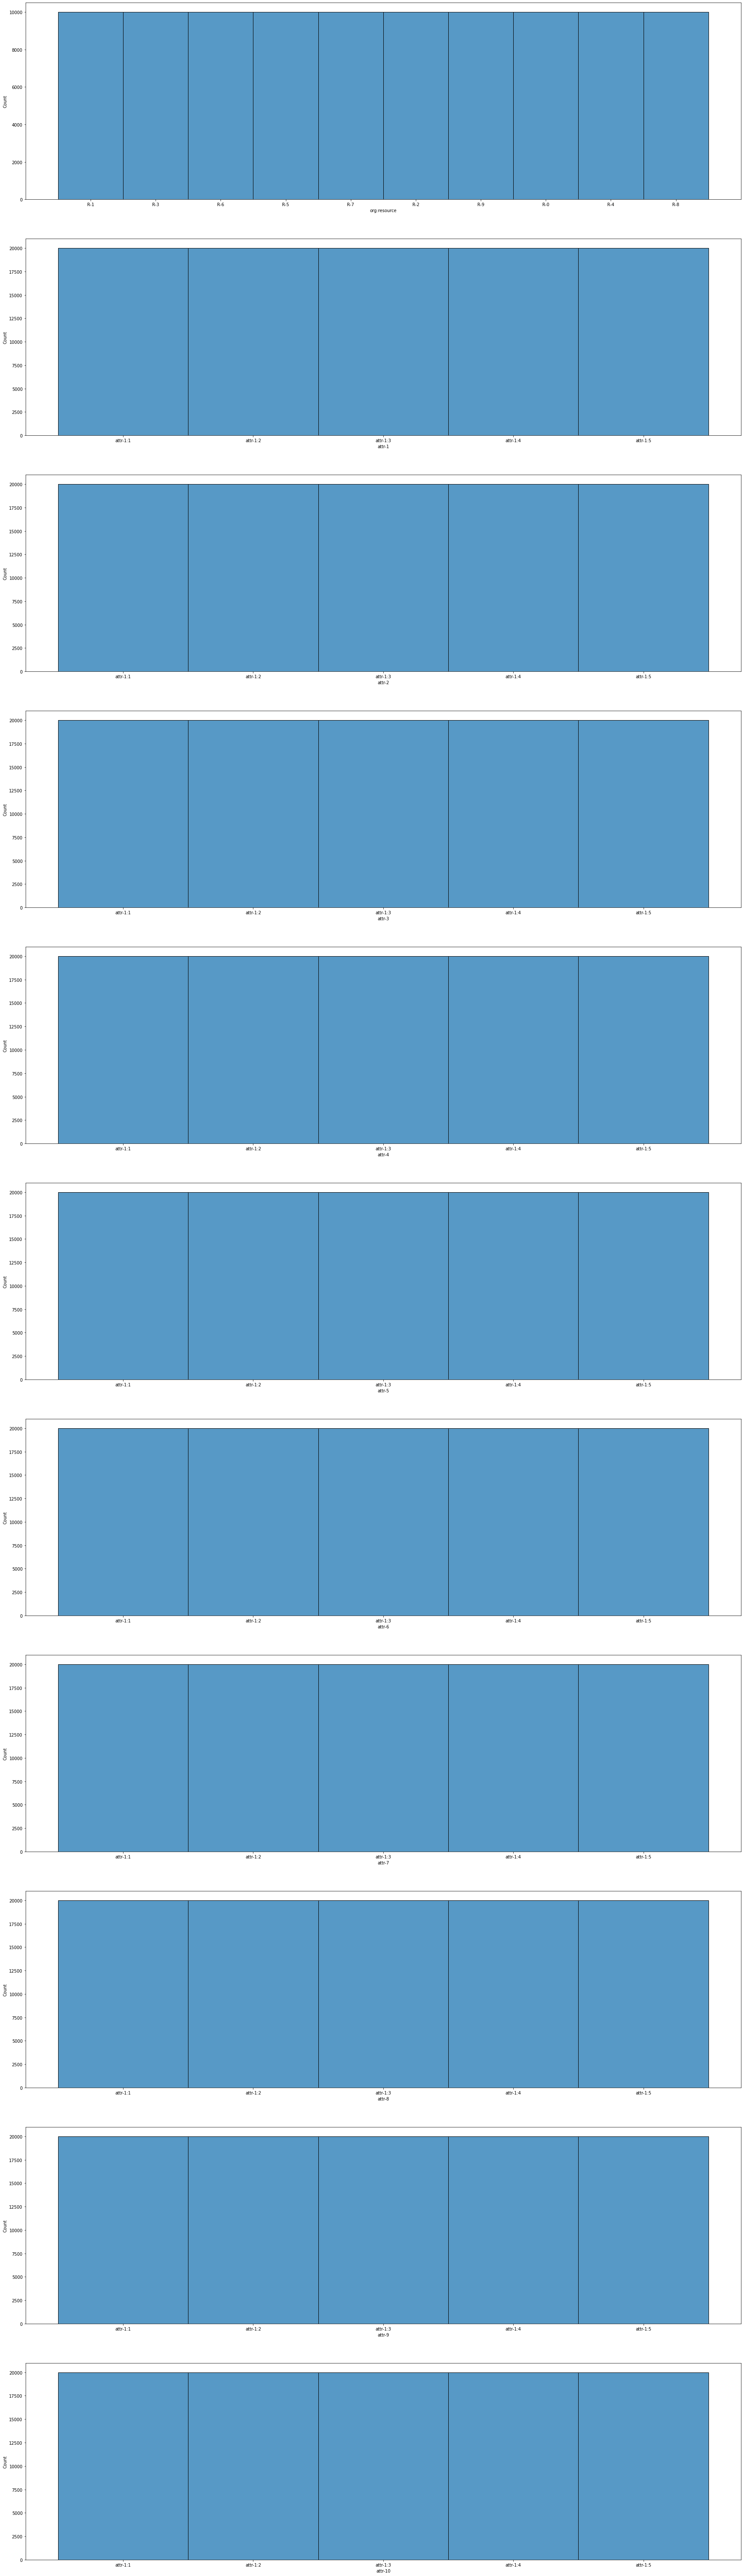

In [3]:
# (1) Events distribute uniformly across resources and uniformly across attribute values:
#     -> Resources share the same uniform distribution of events across attribute values.
#     -> Attribute values share the same uniform distribution of events across resources.

if True:
    # fill resources
    for ie in range(len(data)):
        resource = resources[ie % N_RESOURCES]
        data[ie][1] = resource
    
    np.random.shuffle(data)
    df1 = pd.DataFrame(data, columns=COLUMNS)
    
    # fill attribute values
    N_EVENTS_PER_RESOURCE = int(N_EVENTS / N_RESOURCES)
    
    for attr in N_TYPE_VALUES:
        vals = type_values[attr] * int((N_EVENTS_PER_RESOURCE / len(type_values[attr])))
        for r in resources:
            #np.random.shuffle(vals) # decides whether resources are interchangeable
            df1.loc[df1[const.RESOURCE] == r, attr] = np.array(vals)
    
    # let attributes be related
    for attr in ['attr-{}'.format(x) for x in range(2, 11)]:
        df1[attr] = df1['attr-1']
    
    # fill core dimension attribute values (activity names)
    for val, events in df1.groupby(list(N_TYPE_VALUES.keys())):
        if type(val) is tuple:
            activity_label = '+'.join(val)
        else:
            activity_label = val
        df1.loc[events.index, const.ACTIVITY] = activity_label

    f, ax = get_plots(1+10)

    assert df1.groupby(const.CASE_ID).size().mean() == N_EVENTS_PER_CASE

    assert df1.groupby(const.RESOURCE).size().mean() == (N_EVENTS / N_RESOURCES)
    sns.histplot(df1, x=const.RESOURCE, stat='count', discrete=True, ax=ax[0])

    for i, attr in enumerate(N_TYPE_VALUES):
        assert df1.groupby(attr).size().mean() == (N_EVENTS / N_TYPE_VALUES[attr])
        sns.histplot(df1, x=attr, stat='count', discrete=True, ax=ax[i+1])

    print(df1)
    df1.to_csv('../data/synthetic/new/slog_1.csv', index_label='event_id')

In [ ]:
# (2) Events distribute uniformly across resources but not attribute values:
#     -> Resources share the same (normal) distribution of events across attribute values.
#     -> Attribute values share the same uniform distribution of events across resources.

if False:
    # fill resources
    for ie in range(len(data)):
        resource = resources[ie % N_RESOURCES]
        data[ie][1] = resource

    np.random.shuffle(data)
    df2 = pd.DataFrame(data, columns=COLUMNS)
    # fill attribute values
    # get a sample from attribute values encoded by indices
    indices = np.random.normal(size=int(N_EVENTS/N_RESOURCES))
    min_v = np.min(indices)
    max_v = np.max(indices)
    indices = np.rint(((indices - min_v) / (max_v - min_v)) * (len(type_values['attr-1']) - 1)).astype(int)
    vals = [type_values['attr-1'][i] for i in indices]
    
    for r in resources:
        df2.loc[df2[const.RESOURCE] == r, 'attr-1'] = vals
    
    df2[const.RESOURCE] = pd.Categorical(df2[const.RESOURCE], resources)
    df2['attr-1'] = pd.Categorical(df2['attr-1'], type_values['attr-1'])

    f, ax = get_plots(2)

    assert df2.groupby(const.CASE_ID).size().mean() == N_EVENTS_PER_CASE

    assert df2.groupby(const.RESOURCE).size().mean() == (N_EVENTS / N_RESOURCES)
    sns.histplot(df2, x=const.RESOURCE, stat='count', discrete=True, ax=ax[0])
    
    sns.histplot(df2, x='attr-1', stat='count', discrete=True, ax=ax[1])

    df2.to_csv('data/synthetic/slog_2.csv', index_label='event_id')

In [ ]:
# (3) Events distribute uniformly across attribute values but not resources
#     -> Resources share the same uniform distribution of events across attribute values.
#     -> Attribute values share the same (normal) distribution of events across resources.

if False:
    # fill attribute values
    for ie in range(len(data)):
        attr1_val = type_values['attr-1'][ie % N_TYPE_VALUES['attr-1']]
        data[ie][2] = attr1_val

    np.random.shuffle(data)
    df3 = pd.DataFrame(data, columns=COLUMNS)
    # fill attribute values
    # get a sample from resource values encoded by indices
    indices = np.random.normal(size=int(N_EVENTS/len(type_values['attr-1'])))
    min_v = np.min(indices)
    max_v = np.max(indices)
    indices = np.rint(((indices - min_v) / (max_v - min_v)) * (len(resources) - 1)).astype(int)
    vals = [resources[i] for i in indices]
    
    for v in type_values['attr-1']:
        df3.loc[df3['attr-1'] == v, const.RESOURCE] = vals
    
    df3[const.RESOURCE] = pd.Categorical(df3[const.RESOURCE], resources)
    df3['attr-1'] = pd.Categorical(df3['attr-1'], type_values['attr-1'])

    f, ax = get_plots(2)

    assert df3.groupby(const.CASE_ID).size().mean() == N_EVENTS_PER_CASE

    sns.histplot(df3, x=const.RESOURCE, stat='count', discrete=True, ax=ax[0])
    
    assert df3.groupby('attr-1').size().mean() == (N_EVENTS / N_TYPE_VALUES['attr-1'])
    sns.histplot(df3, x='attr-1', stat='count', discrete=True, ax=ax[1])

    df3.to_csv('data/synthetic/slog_3.csv', index_label='event_id')

In [ ]:
# (4) Events do not distribute uniformly across either attribute values or resources (simulate real-life logs)

if False:
    df4 = pd.DataFrame(data, columns=COLUMNS)
    # fill resource values
    # get a sample from resource values encoded by indices
    indices = np.random.normal(size=N_EVENTS)
    min_v = np.min(indices)
    max_v = np.max(indices)
    r_indices = np.rint(((indices - min_v) / (max_v - min_v)) * (len(resources) - 1)).astype(int)
    r_vals = [resources[i] for i in r_indices]
    df4[const.RESOURCE] = r_vals
    
    # fill attribute values
    # get a sample from attribute values encoded by indices
    indices = np.random.normal(size=N_EVENTS)
    min_v = np.min(indices)
    max_v = np.max(indices)
    attr1_indices = np.rint(((indices - min_v) / (max_v - min_v)) * (len(type_values['attr-1']) - 1)).astype(int)
    attr1_vals = [type_values['attr-1'][i] for i in attr1_indices]
    df4['attr-1'] = attr1_vals
    
    
    
    df4[const.RESOURCE] = pd.Categorical(df4[const.RESOURCE], resources)
    df4['attr-1'] = pd.Categorical(df4['attr-1'], type_values['attr-1'])

    f, ax = get_plots(3)

    assert df4.groupby(const.CASE_ID).size().mean() == N_EVENTS_PER_CASE

    sns.histplot(df4, x=const.RESOURCE, stat='count', discrete=True, ax=ax[0])
    
    sns.histplot(df4[df4[const.RESOURCE] == 'R-45'], x='attr-1', stat='count', discrete=True, ax=ax[1])
    sns.histplot(df4[df4[const.RESOURCE] == 'R-28'], x='attr-1', stat='count', discrete=True, ax=ax[2])

    df4.to_csv('data/synthetic/slog_4.csv', index_label='event_id')